In [107]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.0.0+cu118'

In [108]:
weight = 0.7
bias = 0.3


X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

y[:10], X[:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [109]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [110]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={"size": 14})

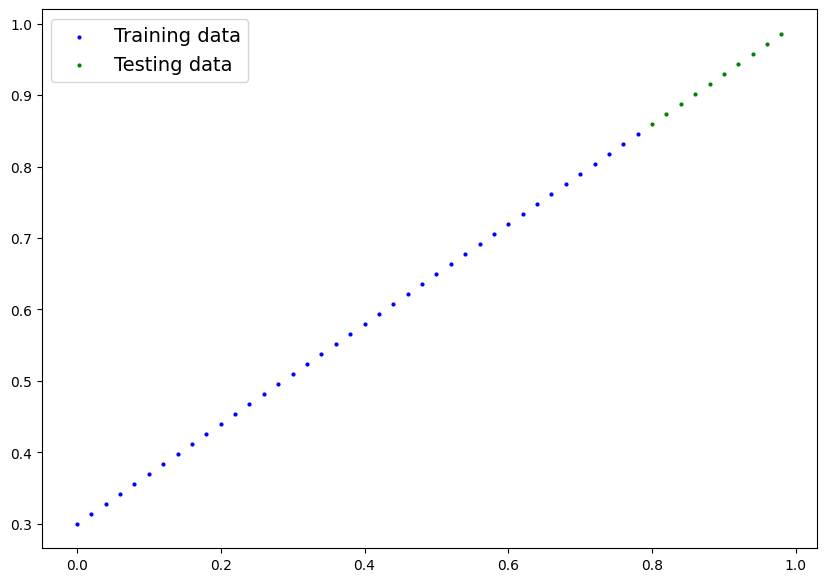

In [111]:
plot_prediction()

In [112]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                    requires_grad=True,
                                    dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                    requires_grad=True,
                                    dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [113]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

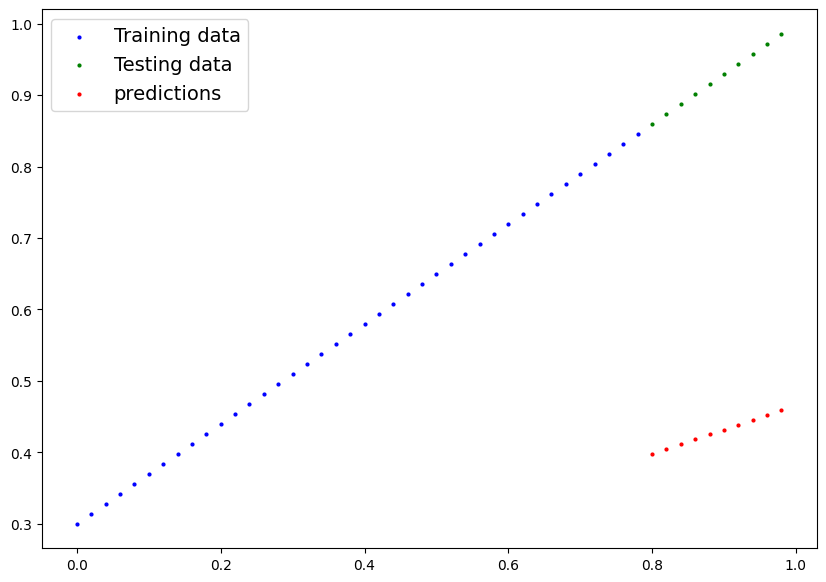

In [114]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

plot_prediction(predictions=y_preds)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [115]:
torch.manual_seed(42)
epochs = 1001

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")






print(loss)

Epoch: 0 | Loss: 0.10493002086877823 | Test loss: 0.23639337718486786
Epoch: 10 | Loss: 0.06683927774429321 | Test loss: 0.16711154580116272
Epoch: 20 | Loss: 0.04299221560359001 | Test loss: 0.12065689265727997
Epoch: 30 | Loss: 0.028054703027009964 | Test loss: 0.08913629502058029
Epoch: 40 | Loss: 0.01869034208357334 | Test loss: 0.06747110188007355
Epoch: 50 | Loss: 0.012812281027436256 | Test loss: 0.05237375572323799
Epoch: 60 | Loss: 0.00911521352827549 | Test loss: 0.041701000183820724
Epoch: 70 | Loss: 0.006782688200473785 | Test loss: 0.03404407948255539
Epoch: 80 | Loss: 0.005304032005369663 | Test loss: 0.02846846543252468
Epoch: 90 | Loss: 0.004359802696853876 | Test loss: 0.024347715079784393
Epoch: 100 | Loss: 0.003750210627913475 | Test loss: 0.021257279440760612
Epoch: 110 | Loss: 0.0033502676524221897 | Test loss: 0.01890578866004944
Epoch: 120 | Loss: 0.0030817987862974405 | Test loss: 0.01709090918302536
Epoch: 130 | Loss: 0.002895899349823594 | Test loss: 0.0156702

In [116]:
import numpy as np

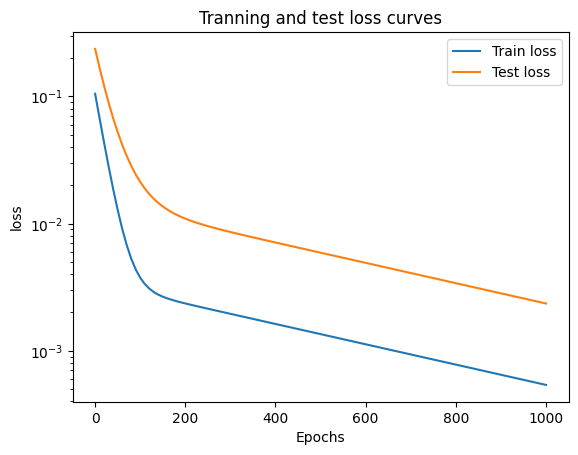

In [117]:
fig, ax = plt.subplots()

ax.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label="Train loss")
ax.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label="Test loss")
ax.set_title("Tranning and test loss curves")
ax.set_ylabel("loss")
ax.set_xlabel("Epochs")
ax.set_yscale('log')
ax.legend()

In [118]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


In [120]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [122]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    y_preds = model_0(X_test)

loaded_model_preds, y_preds, y_preds == loaded_model_preds

(tensor([[0.8208],
         [0.8328],
         [0.8448],
         [0.8568],
         [0.8688],
         [0.8808],
         [0.8928],
         [0.9048],
         [0.9168],
         [0.9288]]),
 tensor([[0.8208],
         [0.8328],
         [0.8448],
         [0.8568],
         [0.8688],
         [0.8808],
         [0.8928],
         [0.9048],
         [0.9168],
         [0.9288]]),
 tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]]))